We are using the California housing data set for this analysis. 

In [ ]:
# Import your relevant packages
from pandas.plotting import scatter_matrix 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


import os # in order to run file I/O operation 
import tarfile # to support compressed (tar) files
from six.moves import urllib # support URL download

# Dataset acquisition
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch housing data from a remote URL to Colab file system"""
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


fetch_housing_data()
import pandas as pd # Pandas library enables data manipulation

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


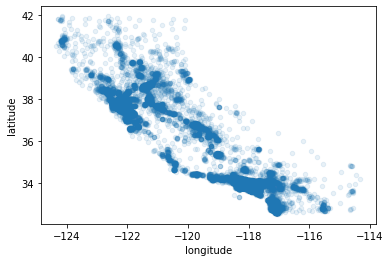

In [ ]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

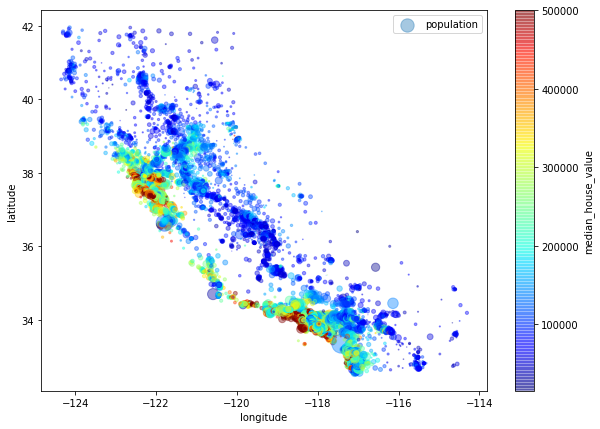

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b27034910>,
      dtype=object)

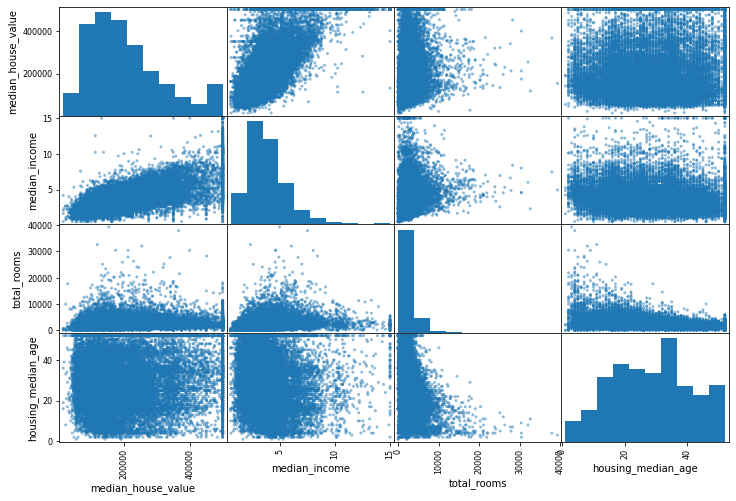

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [ ]:
hous = train_set.drop("median_house_value", axis=1) 
hous = train_set.drop("ocean_proximity", axis = 1)
housing_labels = train_set["median_house_value"].copy()

In [ ]:
# Data preprocessing
imputer = SimpleImputer(strategy="median")
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(hous)
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])


X = full_pipeline.fit_transform(hous)
y = housing_labels


housing_tr = pd.DataFrame(X, columns=hous.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.641303,-0.808863,0.983513,-0.074574,-0.013988,-0.009699,-0.077683,-0.018837,-0.437342
1,-1.439758,0.980369,1.856793,0.416763,-0.076019,-0.132519,-0.022663,2.185237,1.906160
2,-1.285051,0.853905,0.110233,0.715140,1.684703,1.097431,1.696072,-0.106583,0.881745
3,-0.815939,1.462805,-1.001215,-0.471952,-0.577038,-0.557123,-0.559767,-0.377698,0.280269
4,-0.087318,0.558822,-1.080604,0.071177,-0.243026,-0.014086,-0.153664,0.558387,-0.844681
...,...,...,...,...,...,...,...,...,...
18571,0.805991,-0.869753,0.507178,-0.599370,-0.803689,-0.674679,-0.740549,1.319983,0.193601
18572,1.070490,-0.757340,0.348400,0.204553,0.076672,0.285945,-0.132704,-0.434945,-0.945216
18573,0.596388,-0.752657,0.586567,-0.245992,0.074286,0.288577,0.071658,-0.496050,0.132067
18574,-1.190230,0.910111,-1.080604,0.429596,0.141089,0.307000,0.155499,0.975975,0.664208


In [ ]:
# DUMMY REGRESSOR

from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(housing_tr, housing_labels)

some_data = hous.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)

print("Predictions:", dummy_regr.predict(some_data_prepared))
print('Actual:', list(some_labels))

Predictions: [179650. 179650. 179650. 179650. 179650.]
Actual: [156400.0, 426800.0, 308600.0, 239200.0, 109400.0]


In [ ]:
# LINEAR REGRESSOR

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)


print("Predictions:", lin_reg.predict(some_data_prepared))
print('Actual:', list(some_labels))

Predictions: [112860.93783043 390105.88437677 268913.75167789 197756.94956873
  64671.17271328]
Actual: [156400.0, 426800.0, 308600.0, 239200.0, 109400.0]


In [ ]:
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_tr, housing_labels)

print("Predictions:", forest_reg.predict(some_data_prepared))
print('Actual:', list(some_labels))

Predictions: [112903. 390099. 268919. 197799.  64702.]
Actual: [156400.0, 426800.0, 308600.0, 239200.0, 109400.0]


In [ ]:
# K NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(housing_tr, housing_labels)

print("Predictions:", knn.predict(some_data_prepared))
print('Actual:', list(some_labels))

Predictions: [ 98900. 348700. 215600. 137500.  68500.]
Actual: [156400.0, 426800.0, 308600.0, 239200.0, 109400.0]


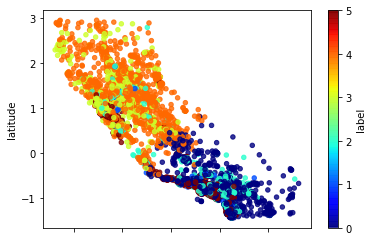

In [ ]:
# Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)

kmeans.fit(housing_tr)

df = np.stack((housing_tr.iloc[:,0], housing_tr.iloc[:,1], kmeans.predict(housing_tr)),axis = -1)

cols_2 = ['longitude','latitude','label']
plotting = pd.DataFrame(df, columns=cols_2)
plotting.plot(kind='scatter', x="longitude", y="latitude",alpha = 0.8, c="label", cmap=plt.get_cmap("jet"), colorbar=True)
